<a href="https://colab.research.google.com/github/Karachristou/Catan-Calculator/blob/main/catan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

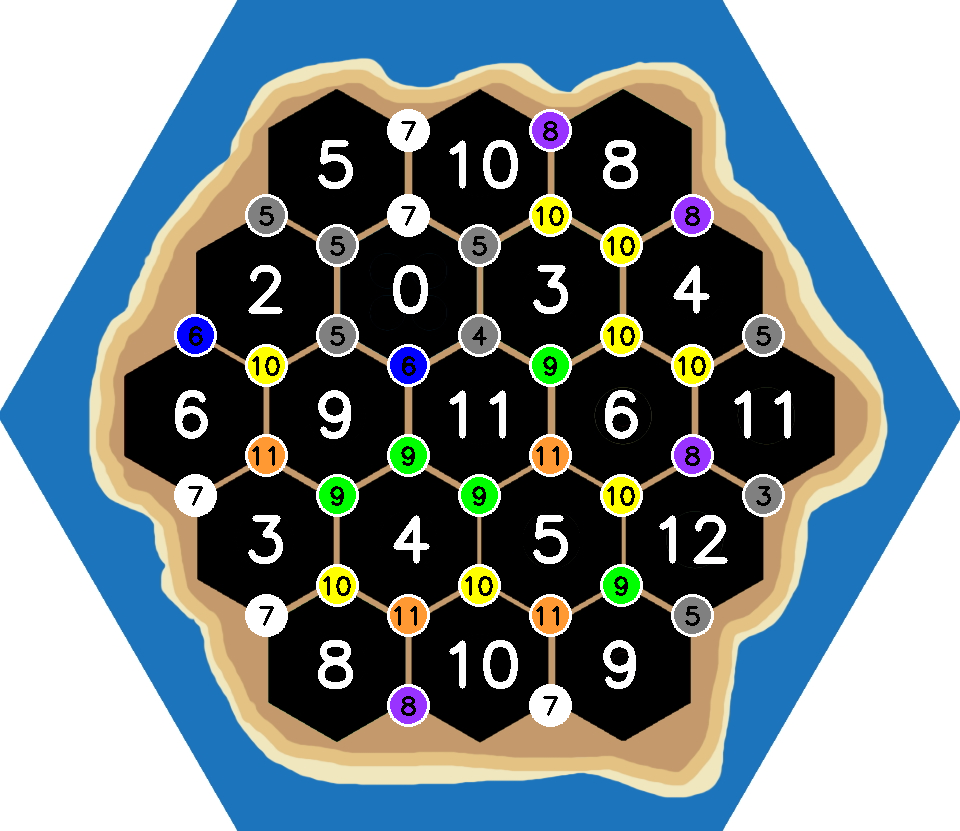

In [ ]:
#@title Please imput numbers seperated with a space, from top to bottom, left to right! add 0 for desert! { vertical-output: true, display-mode: "form" }

from pathlib import Path

Numbers = "5 10 8 2 0 3 4 6 9 11 6 11 3 4 5 12 8 10 9" #@param {type:"string"}
from random import randrange
from operator import itemgetter
import numpy as np
import cv2
from IPython.utils import io
from google.colab.patches import cv2_imshow

points = 0
order = [[1,2],[2,3],[1,4],[1,4,5],[1,5,2],[2,5,6],[2,3,6],[3,6,7],[3,7],
     [4,8],[4,8,9],[4,9,5],[5,9,10],[5,10,6],[6,10,11],[6,11,7],[7,11,12],[7,12],
     [8,13],[8,9,13],[9,13,14],[9,10,14],[10,14,15],[10,11,15],[11,15,16],[11,12,16],[12,16],
     [13,17],[13,17,14],[14,17,18],[14,15,18],[15,18,19],[15,16,19],[16,19],[17,18],[18,19]]
 
board = []
# print("please imput numbers seperated with a space, from top to bottom, left to right! add 0 for desert!")
# inp = (input('Input numbers: '))
inp = Numbers
x = inp.split(" ")
while len(x) != 19:
  print("You entered", len(x), "numbers it must be 19 numbers! try again!")
  inp = (input('Input numbers: '))
  x = inp.split(" ")
 
p = 1
for i in x:
  if i.isnumeric() == False or int(i) == 7 or int(i) < 0 or int(i) > 12:
    print("\033[1m" + i + "\033[0m" + " in position " + "\033[1m" + str(p) + "\033[0m" +  " is not valid number!")
    while i.isnumeric() == False or int(i) == 7 or int(i) < 0 or int(i) > 12:
      i = (input("A valid number is from 0 to 12 excluding 7! Please enter valid number:"))
    board.append(int(i))
  else:
    board.append(int(i))
  p += 1
 
 
allpoints = []
for o in order:
  points = 0
  thisboard = []
  for i in o:
    i = i-1
    if board[i] == 6 or board[i] == 8 :points += 5
    if board[i] == 5 or board[i] == 9 :points += 4 
    if board[i] == 4 or board[i] == 10 :points += 3
    if board[i] == 3 or board[i] == 11 :points += 2 
    if board[i] == 2 or board[i] == 12 :points += 1
    thisboard.append(board[i])
  allpoints.append([points, thisboard])
 
 
coordinates = [[408,35], [550,35],
               [266,120], [337,150],  [408,120], [479,150], [550,120], [621,150], [692,120],
               [195,240], [266,270], [337,240], [408,270], [479,240], [550,270], [621,240], [692,270], [763,240],
               [195,400], [266,360], [337,400], [408,360],[479,400], [550,360],[621,400], [692,360],[763,400],
               [266,520], [337,490], [408,520], [479,490],[550,520], [621,490],[692,520],
               [408,610], [550,610]]
          
coordinates2 = [[185,55], [330,55],[470,55], 
                [115,180],  [260,180], [400,180], [540,180],
                [40,305], [185,305], [330,305], [470,305], [615,305],
                [115,430], [260,430], [400,430], [540,430], 
                [185,555], [330,555], [470,555]]
               
 
my_file = Path("board.jpg")
if not my_file.is_file():
  with io.capture_output() as captured:
    !wget -O board.jpg https://i.ibb.co/xHkb8Vm/board2.jpg
    print("Img Downloaded")

img = cv2.imread("board.jpg" ,cv2.IMREAD_COLOR)
font = cv2.FONT_HERSHEY_SIMPLEX
 
x=0
for j,i in coordinates:
      text = str(allpoints[x][0])
 
      x+=1
      i +=95
      if int(text) >= 12:
        rgb =  (0, 0,255)
      elif int(text) == 11:
        rgb = (51,153,255)
      elif int(text) == 10:
        rgb = (0,255,255)
      elif int(text) == 9:
        rgb = (0,255,0)
      elif int(text) == 8:
        rgb = (255,51,153)
      elif int(text) == 7:
        rgb = (255,255,255)
      elif int(text) == 6:
        rgb = (255,0,0)
      else:
        rgb = (128, 128, 128)
      cv2.circle(img,(j, i), 20, rgb, -1)
      cv2.circle(img,(j, i), 20, (255, 255, 255), 2)
      if len(text) == 2:
        j = j - 10
      cv2.putText(img, text , (j-8,i+9), font, 0.8, (0, 0, 0), 2)
 
 
 
x=0
for j,i in coordinates2:
      text = str(board[x])
      if len(text) == 2:
        j = j - 20
      cv2.putText(img, text, (j+130,i+130), font, 2, (255, 255, 255), 5)
      x+=1
cv2_imshow(img)
 
#5 10 8 2 9 3 4 6 4 11 0 11 3 5 6 12 8 10 9